In [2]:
!pip install opencv-python mediapipe


  Using cached mediapipe-0.10.21-cp311-cp311-win_amd64.whl.metadata (10 kB)
  Using cached jax-0.5.2-py3-none-any.whl.metadata (22 kB)
Using cached mediapipe-0.10.21-cp311-cp311-win_amd64.whl (51.0 MB)
Using cached jax-0.5.2-py3-none-any.whl (2.4 MB)



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np


In [4]:
def annotate_pose(image_path, output_path="annotated_image.jpg"):
    
    mp_drawing = mp.solutions.drawing_utils
    mp_pose = mp.solutions.pose

    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image at {image_path}")
        return

    with mp_pose.Pose(
        static_image_mode=True,
        model_complexity=2,
        enable_segmentation=False,
        min_detection_confidence=0.5
    ) as pose:
        # Convert the image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Process the image to detect the pose
        results = pose.process(image_rgb)

    # Check if pose landmarks were detected
    if results.pose_landmarks:
        # Draw the pose landmarks on the image
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
            mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2)
        )
    else:
        print("No pose detected in the image.")
        return

    # Save the annotated image
    cv2.imwrite(output_path, image)
    print(f"Annotated image saved to {output_path}")


In [8]:
# Specify the path to your image file
image_path = "J01 - 28.08.2024.jpg"  # e.g., "C:/Users/YourName/Pictures/photo.jpg"
print(f"Using image: {image_path}")


Using image: J01 - 28.08.2024.jpg


No pose detected in the image.


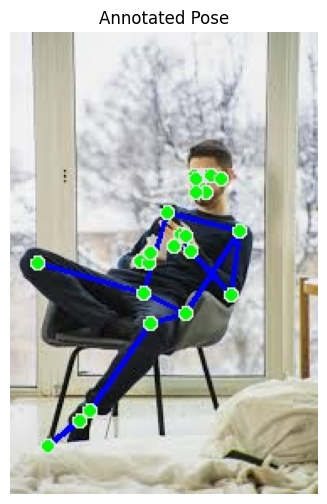

In [9]:
# Annotate the image
annotate_pose(image_path)

# Read and display the annotated image
annotated_image = cv2.imread("annotated_image.jpg")
if annotated_image is not None:
    # Convert BGR (default in OpenCV) to RGB for proper display in matplotlib
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(annotated_image)
    plt.axis("off")
    plt.title("Annotated Pose")
    plt.show()
else:
    print("Failed to load the annotated image. Please check the image path and pose detection.")
